In [1]:
import pandas as pd
import numpy as np

In [2]:
dat = pd.read_csv('data/project_db_500.csv',low_memory=False)
dat.columns

Index(['script_ID', 'project_ID', 'sprite-type', 'sprite-name', 'script-rank',
       'coordinates', 'total-blocks', 'p_ID', 'project-name', 'username',
       'total-views', 'total-remixes', 'total-favorites', 'total-loves',
       'is-remix', 'Script_ID', 'block-rank', 'block-type', 'param1', 'param2',
       'param3', 'param4', 'param5', 'param6', 'param7', 'param8', 'param9',
       'param10', 'param11', 'param12', 'param13', 'param14', 'param15',
       'param16', 'param17', 'param18', 'param19', 'param20', 'param21',
       'param22', 'param23', 'param24', 'project_ID.1', 'Abstraction',
       'Parallelism', 'Logic', 'Synchronization', 'FlowControl',
       'UserInteractivity', 'DataRepresentation', 'Mastery', 'Clones',
       'CustomBlocks', 'InstancesSprites'],
      dtype='object')

In [3]:
#replacing dashes with underscores
def clean(dat):
    dat.columns = [i.replace('-', '_') for i in dat.columns]
    #dat = dat.drop(columns=['Script_ID','p_ID'])
    dat = dat[dat.columns[~dat.columns.str.contains('param')]]
    dat = dat.drop(columns=['sprite_type','sprite_name','script_rank','coordinates','username','project_ID.1','Script_ID','p_ID'])
    return dat

can certainly drop some of the columns, especially the redundant ones (and probably some others as well)
redundant: 
    script_ID and Script_ID
    project_ID and p_ID
will consider removing teh "param*" columns, since we're not really concerned with the pars put into the blocks

In [4]:
dat = pd.read_csv('data/project_db_1000.csv',low_memory=False)
dat = clean(dat)
dat.head()

,script_ID,project_ID,total_blocks,project_name,total_views,total_remixes,total_favorites,total_loves,is_remix,block_rank,...,Parallelism,Logic,Synchronization,FlowControl,UserInteractivity,DataRepresentation,Mastery,Clones,CustomBlocks,InstancesSprites
0,30920,67250604,2,Will_Wam Duel,7,0,0,0,0,0,...,3,3,3,3,2,2,19,32,9,1
1,30920,67250604,2,Will_Wam Duel,7,0,0,0,0,1,...,3,3,3,3,2,2,19,32,9,1
2,30921,67250604,3,Will_Wam Duel,7,0,0,0,0,0,...,3,3,3,3,2,2,19,32,9,1
3,30921,67250604,3,Will_Wam Duel,7,0,0,0,0,1,...,3,3,3,3,2,2,19,32,9,1
4,30921,67250604,3,Will_Wam Duel,7,0,0,0,0,2,...,3,3,3,3,2,2,19,32,9,1


In [5]:
popularity_grades = dat.groupby('project_ID').first()
blocks_flattened = dat.groupby(['project_ID'])['block_type'].value_counts().unstack(fill_value=0).reset_index()
merged = popularity_grades.merge(blocks_flattened, left_on='project_ID', right_on='project_ID', how = 'left')
merged.head()



,project_ID,script_ID,total_blocks,project_name,total_views,total_remixes,total_favorites,total_loves,is_remix,block_rank,...,whenGreenFlag,whenIReceive,whenKeyPressed,whenSceneStarts,whenSensorGreaterThan,xpos,xpos:,ypos,ypos:,|
0,67250604,30920,2,Will_Wam Duel,7,0,0,0,0,0,...,12,75,3,3,0,65,5,6,5,126
1,69174204,34409,1,Get 'em,1,0,0,0,0,0,...,70,0,2,0,0,0,0,0,0,0
2,73886662,41250,26,What I Believe By Skillet Lyrics,1,0,1,1,0,4,...,2,0,0,0,0,0,0,0,0,0
3,85272524,69410,2,Ghoul and ghost game,1,0,0,0,0,0,...,5,3,4,0,0,0,0,0,0,0
4,87993806,85225,9,Star Wars Laser Concept,2,0,1,1,0,0,...,60,0,0,0,0,0,0,0,0,0


In [6]:
#dat_train = pd.read_csv('data/project_db_1000.csv',low_memory=False)
#dat_train = clean(dat)
dat_train = merged.drop(columns=['project_ID','script_ID','project_name','block_rank','block_type'])
dat_train.head()



,total_blocks,total_views,total_remixes,total_favorites,total_loves,is_remix,Abstraction,Parallelism,Logic,Synchronization,...,whenGreenFlag,whenIReceive,whenKeyPressed,whenSceneStarts,whenSensorGreaterThan,xpos,xpos:,ypos,ypos:,|
0,2,7,0,0,0,0,3,3,3,3,...,12,75,3,3,0,65,5,6,5,126
1,1,1,0,0,0,0,3,1,1,1,...,70,0,2,0,0,0,0,0,0,0
2,26,1,0,1,1,0,1,1,0,1,...,2,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,2,3,1,2,...,5,3,4,0,0,0,0,0,0,0
4,9,2,0,1,1,0,3,1,2,1,...,60,0,0,0,0,0,0,0,0,0


In [7]:
labels = np.array(dat_train[['total_remixes','total_views','total_favorites','total_loves']])
dat_train = dat_train.drop(columns=['total_remixes','total_views','total_favorites','total_loves'])
dat_train.columns
print(labels)

[[0 7 0 0]
 [0 1 0 0]
 [0 1 1 1]
 ...
 [0 2 0 0]
 [0 1 1 1]
 [0 2 0 0]]


In [8]:
features = dat_train
#0 is total remix, 1 is total view, 2 is total fav, 3 is total love
#features = dat_train.drop(columns=['total_remixes','total_views','total_favorites','total_loves'])
feature_list = np.array(features.columns)
features = np.array(features)
print(labels)
print(features)

#something bad happening with teh labels. I think they need to be pulled out of the features before we do one-hot?
#need to flatten the blocks to be one row per p_id

[[0 7 0 0]
 [0 1 0 0]
 [0 1 1 1]
 ...
 [0 2 0 0]
 [0 1 1 1]
 [0 2 0 0]]
[[  2   0   3 ...   6   5 126]
 [  1   0   3 ...   0   0   0]
 [ 26   0   1 ...   0   0   0]
 ...
 [  7   0   1 ...   0   0   0]
 [  2   0   1 ...   0   0   0]
 [  4   0   1 ...   0   0   0]]


In [9]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.10, random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Total remix mean:', test_labels[0].mean())
print('Total view mean:', test_labels[1].mean())
print('Total fav mean:', test_labels[2].mean())
print('Total love mean:',test_labels[3].mean())

#consider removing total views, probably hugely zero inflated

Training Features Shape: (828, 146)
Training Labels Shape: (828, 4)
Testing Features Shape: (93, 146)
Testing Labels Shape: (93, 4)
Total remix mean: 2.75
Total view mean: 0.5
Total fav mean: 1.75
Total love mean: 5.75


In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42) # Train the model on training data
model = MultiOutputRegressor(estimator=rf)
#print(model)

model.fit(train_features, train_labels)
score = model.score(train_features, train_labels)
print("Training score:", score)
#this is how well the training data was fit
#need to inspect how well it works for test data

Training score: 0.8525388401086791


Training score: -0.1719232743846308


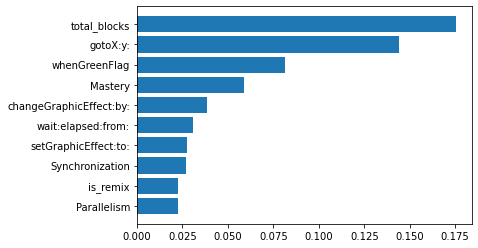

In [16]:
from matplotlib import pyplot as plt
label1_feat_imps = model.estimators_[0].feature_importances_
sorted_idx = model.estimators_[0].feature_importances_.argsort()[-10:]
plt.barh(feature_list[sorted_idx], model.estimators_[0].feature_importances_[sorted_idx])
#need to add plots for other outcome variables as well



In [15]:
from sklearn.inspection import permutation_importance
permutation_importance(model, train_features, test_features, tandom_state=0)

TypeError: permutation_importance() got an unexpected keyword argument 'tandom_state'

In [ ]:
#create plots showing prediction accuracy
from sklearn.metrics import mean_squared_error
score = model.score(train_features, train_labels)
print("Training score:", score)
label_pred = model.predict(test_features)
print("y1 MSE:%.4f" % mean_squared_error(test_labels[:,0], label_pred[:,0]))
print("y2 MSE:%.4f" % mean_squared_error(test_labels[:,1], label_pred[:,1]))
print("y3 MSE:%.4f" % mean_squared_error(test_labels[:,2], label_pred[:,2]))
print("y4 MSE:%.4f" % mean_squared_error(test_labels[:,3], label_pred[:,3]))


In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5))

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
model.estimators_[0]

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydotplus
tree = model.estimators_[0]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [ ]:
permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)